In [3]:
import pandas as pd
data=pd.read_csv("C:\\Users\\Mallesh\\Desktop\\Data Analysis(krish Naik)\\archive\\IPL_Ball_by_Ball_2008_2022.csv")


In [5]:
data.head()
# data.info()
data.shape

(225954, 17)

--------1.Data cleaning----------

In [6]:
data.dropna(axis=1,inplace=True)

In [7]:
data.shape

(225954, 13)

In [8]:
data.head(10)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,0,0,0,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,0,1,1,0,0,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,1,0,1,0,0,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,0,0,0,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,0,0,0,Rajasthan Royals
5,1312200,1,0,6,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,0,0,0,Rajasthan Royals
6,1312200,1,1,1,JC Buttler,Yash Dayal,YBK Jaiswal,0,0,0,0,0,Rajasthan Royals
7,1312200,1,1,2,JC Buttler,Yash Dayal,YBK Jaiswal,0,0,0,0,0,Rajasthan Royals
8,1312200,1,1,3,JC Buttler,Yash Dayal,YBK Jaiswal,4,0,4,0,0,Rajasthan Royals
9,1312200,1,1,4,JC Buttler,Yash Dayal,YBK Jaiswal,0,0,0,0,0,Rajasthan Royals


In [9]:
#------------finding extra runs in every match-------------
df=data.groupby("ID")["extras_run"].sum()

In [14]:
df.head

<bound method NDFrame.head of ID
335982     36
335983     17
335984     17
335985     16
335986     38
           ..
1304116    18
1312197    24
1312198    32
1312199    15
1312200    11
Name: extras_run, Length: 950, dtype: int64>

<Axes: title={'center': 'total runs in ever match'}, xlabel='ID'>

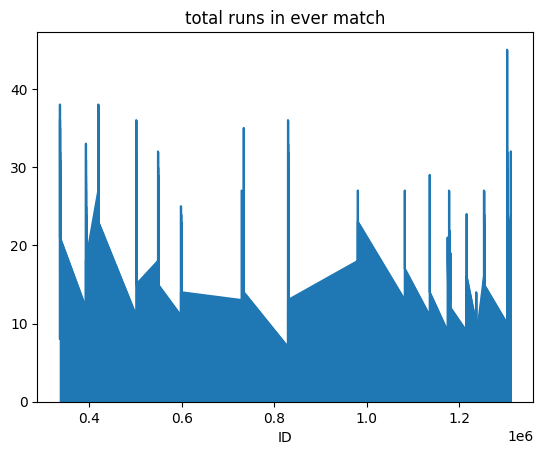

In [15]:
df.plot(kind="area",title="total runs in ever match")


In [16]:
#--------top 10 batsmans with most runs in ipl-------
most_runs=data.groupby("batter")["total_run"].sum().sort_values(ascending=False).head(10)


In [17]:
most_runs

batter
V Kohli           6876
S Dhawan          6561
DA Warner         6191
RG Sharma         6083
SK Raina          5780
AB de Villiers    5354
CH Gayle          5336
RV Uthappa        5246
MS Dhoni          5221
KD Karthik        4572
Name: total_run, dtype: int64

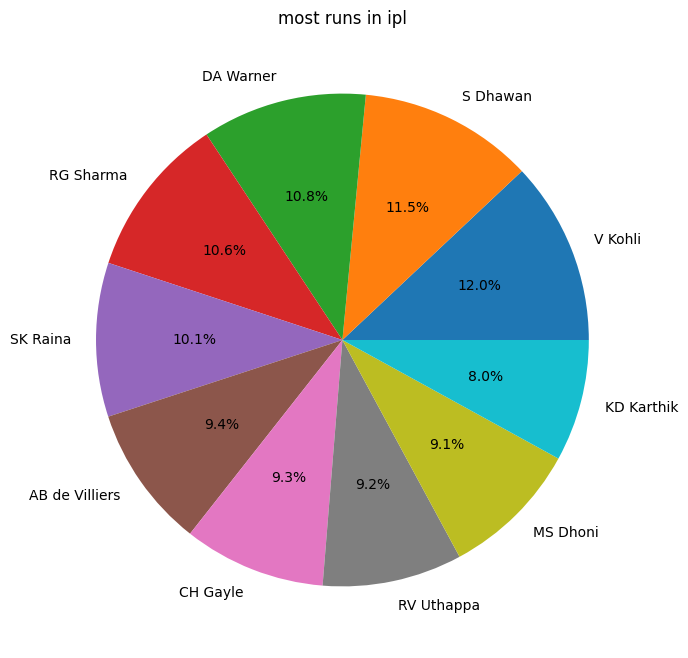

In [18]:
# most_runs.plot(kind="pie")
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.pie(most_runs,labels=most_runs.index,autopct="%1.1f%%")
plt.title("most runs in ipl")
plt.show()

#----   TOP 10 BOWLERS WITH MOST WICKETS----

In [19]:
data["isWicketDelivery"]

0         0
1         0
2         0
3         0
4         0
         ..
225949    0
225950    0
225951    0
225952    0
225953    1
Name: isWicketDelivery, Length: 225954, dtype: int64

In [20]:
most_wickets=data.groupby("bowler")["isWicketDelivery"].sum().sort_values(ascending=False).head(10)

In [21]:
most_wickets

bowler
DJ Bravo           207
SL Malinga         188
A Mishra           175
R Ashwin           174
YS Chahal          172
SP Narine          171
PP Chawla          165
B Kumar            165
JJ Bumrah          161
Harbhajan Singh    161
Name: isWicketDelivery, dtype: int64

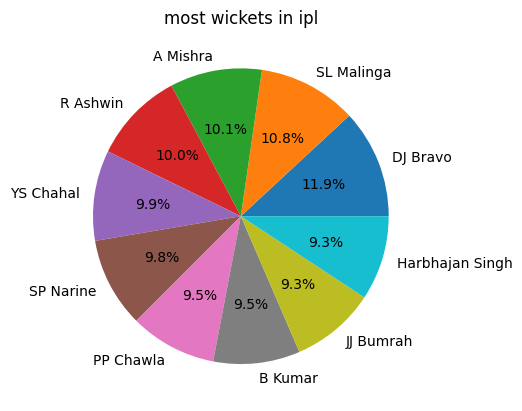

In [22]:
plt.pie(most_wickets,labels=most_wickets.index,autopct="%1.1f%%")
plt.title("most wickets in ipl")
plt.show()

#---------team with total scores in ipl-------------

In [23]:
team_scores=data.groupby("BattingTeam")["total_run"].sum().sort_values(ascending=False).head(5)

In [24]:
team_scores

BattingTeam
Mumbai Indians                 36663
Royal Challengers Bangalore    35190
Kolkata Knight Riders          34201
Chennai Super Kings            33393
Kings XI Punjab                30064
Name: total_run, dtype: int64

In [25]:
team_scores.shape

(5,)

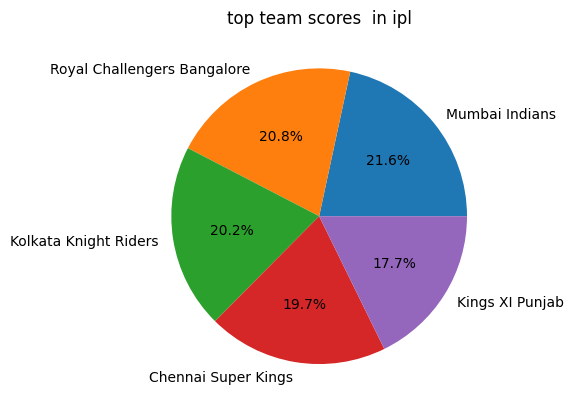

In [26]:
plt.pie(team_scores,labels=team_scores.index,autopct="%1.1f%%")
plt.title("top team scores  in ipl")
plt.show()

#----------highest strike rate----

In [27]:
strike_rate=data.groupby("batter").agg(total_runs=("total_run","sum"),balls_faced=("batter","count"))

In [28]:
strike_rate

,total_runs,balls_faced
batter,,
A Ashish Reddy,288,196
A Badoni,173,139
A Chandila,4,7
A Chopra,58,75
A Choudhary,25,20
...,...,...
Yash Dayal,0,1
Yashpal Singh,49,67
Younis Khan,3,7


In [29]:
strike_rate["strike_rate"]=strike_rate["total_runs"]/strike_rate["balls_faced"]*100

In [30]:
strike_rate

,total_runs,balls_faced,strike_rate
batter,,,
A Ashish Reddy,288,196,146.938776
A Badoni,173,139,124.460432
A Chandila,4,7,57.142857
A Chopra,58,75,77.333333
A Choudhary,25,20,125.000000
...,...,...,...
Yash Dayal,0,1,0.000000
Yashpal Singh,49,67,73.134328
Younis Khan,3,7,42.857143


In [31]:
strike_rate2=strike_rate.sort_values("strike_rate",ascending=False).head(10)
strike_rate2

,total_runs,balls_faced,strike_rate
batter,,,
PN Mankad,4,1,400.000000
B Stanlake,5,2,250.000000
Umar Gul,44,19,231.578947
TH David,192,94,204.255319
RS Sodhi,4,2,200.000000
KMDN Kulasekara,6,3,200.000000
ER Dwivedi,29,15,193.333333
Shahid Afridi,82,46,178.260870
AD Russell,2154,1212,177.722772


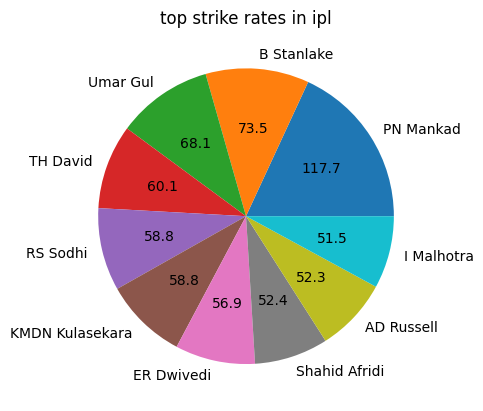

In [83]:
plt.pie(strike_rate2["strike_rate"],labels=strike_rate2.index,autopct=lambda p:f"{(p*sum(strike_rate['strike_rate'])/10000):.1f}")
plt.title("top strike rates in ipl")
plt.show()

In [34]:
df

ID
335982     36
335983     17
335984     17
335985     16
335986     38
           ..
1304116    18
1312197    24
1312198    32
1312199    15
1312200    11
Name: extras_run, Length: 950, dtype: int64

In [35]:
import pandas as pd
data=pd.read_csv("C:\\Users\\Mallesh\\Desktop\\Data Analysis(krish Naik)\\archive\\IPL_Ball_by_Ball_2008_2022.csv")


In [36]:
df=pd.DataFrame(data)

In [37]:
df

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [50]:
#------how many wickets through caught outs------
df2=df[df["kind"]=="caught"]
df2

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
23,1312200,1,3,6,YBK Jaiswal,Yash Dayal,JC Buttler,NaN,0,0,0,0,1,YBK Jaiswal,caught,R Sai Kishore,Rajasthan Royals
49,1312200,1,8,2,SV Samson,HH Pandya,JC Buttler,NaN,0,0,0,0,1,SV Samson,caught,R Sai Kishore,Rajasthan Royals
70,1312200,1,11,5,D Padikkal,Rashid Khan,JC Buttler,NaN,0,0,0,0,1,D Padikkal,caught,Mohammed Shami,Rajasthan Royals
72,1312200,1,12,1,JC Buttler,HH Pandya,SO Hetmyer,NaN,0,0,0,0,1,JC Buttler,caught,WP Saha,Rajasthan Royals
94,1312200,1,15,5,R Ashwin,R Sai Kishore,R Parag,NaN,0,0,0,0,1,R Ashwin,caught,DA Miller,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225886,335982,2,5,2,W Jaffer,AB Dinda,CL White,NaN,0,0,0,0,1,W Jaffer,caught,RT Ponting,Royal Challengers Bangalore
225903,335982,2,7,5,MV Boucher,SC Ganguly,CL White,NaN,0,0,0,0,1,MV Boucher,caught,M Kartik,Royal Challengers Bangalore
225906,335982,2,8,2,B Akhil,AB Agarkar,CL White,NaN,0,0,0,0,1,B Akhil,caught,RT Ponting,Royal Challengers Bangalore
225912,335982,2,8,8,CL White,AB Agarkar,AA Noffke,NaN,0,0,0,0,1,CL White,caught,WP Saha,Royal Challengers Bangalore


In [57]:
df_caughts=df2.groupby("isWicketDelivery")["kind"].count()

In [58]:
print("caught outs are ",df_caughts)

caught outs are  isWicketDelivery
1    6837
Name: kind, dtype: int64


In [64]:
df4=df[df["overs"]<=5]

In [65]:
df4

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225886,335982,2,5,2,W Jaffer,AB Dinda,CL White,NaN,0,0,0,0,1,W Jaffer,caught,RT Ponting,Royal Challengers Bangalore
225887,335982,2,5,3,MV Boucher,AB Dinda,CL White,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225888,335982,2,5,4,MV Boucher,AB Dinda,CL White,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225889,335982,2,5,5,CL White,AB Dinda,MV Boucher,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [66]:
df4.head(5)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


HIGHEST RUNS IN POWERPLAY


In [84]:
power_play=df4.groupby(["BattingTeam","ID"])["batsman_run"].sum().sort_values(ascending=False)

In [85]:
power_play.head(5)

BattingTeam            ID     
Kolkata Knight Riders  1082636    103
Chennai Super Kings    734047      94
                       829729      86
Kings XI Punjab        734007      85
Mumbai Indians         1254088     82
Name: batsman_run, dtype: int64

HIGHEST WICKETS IN POWERPLAY BY TEAM

In [89]:
pp_wickets=df4.groupby("ID")["isWicketDelivery"].sum().sort_values(ascending=False)
pp_wickets

ID
1304105    9
501229     9
1216493    8
1178424    8
1216517    8
          ..
1304061    0
734045     0
1304064    0
392211     0
829813     0
Name: isWicketDelivery, Length: 950, dtype: int64

In [88]:
pp_wickets.head()

ID
1304105    9
501229     9
1216493    8
1178424    8
1216517    8
Name: isWicketDelivery, dtype: int64